In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from math import *

In [3]:
data = pd.read_csv('college.csv')
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [18]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,No
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,No
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,No
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,Yes


In [19]:
print(data.describe())

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

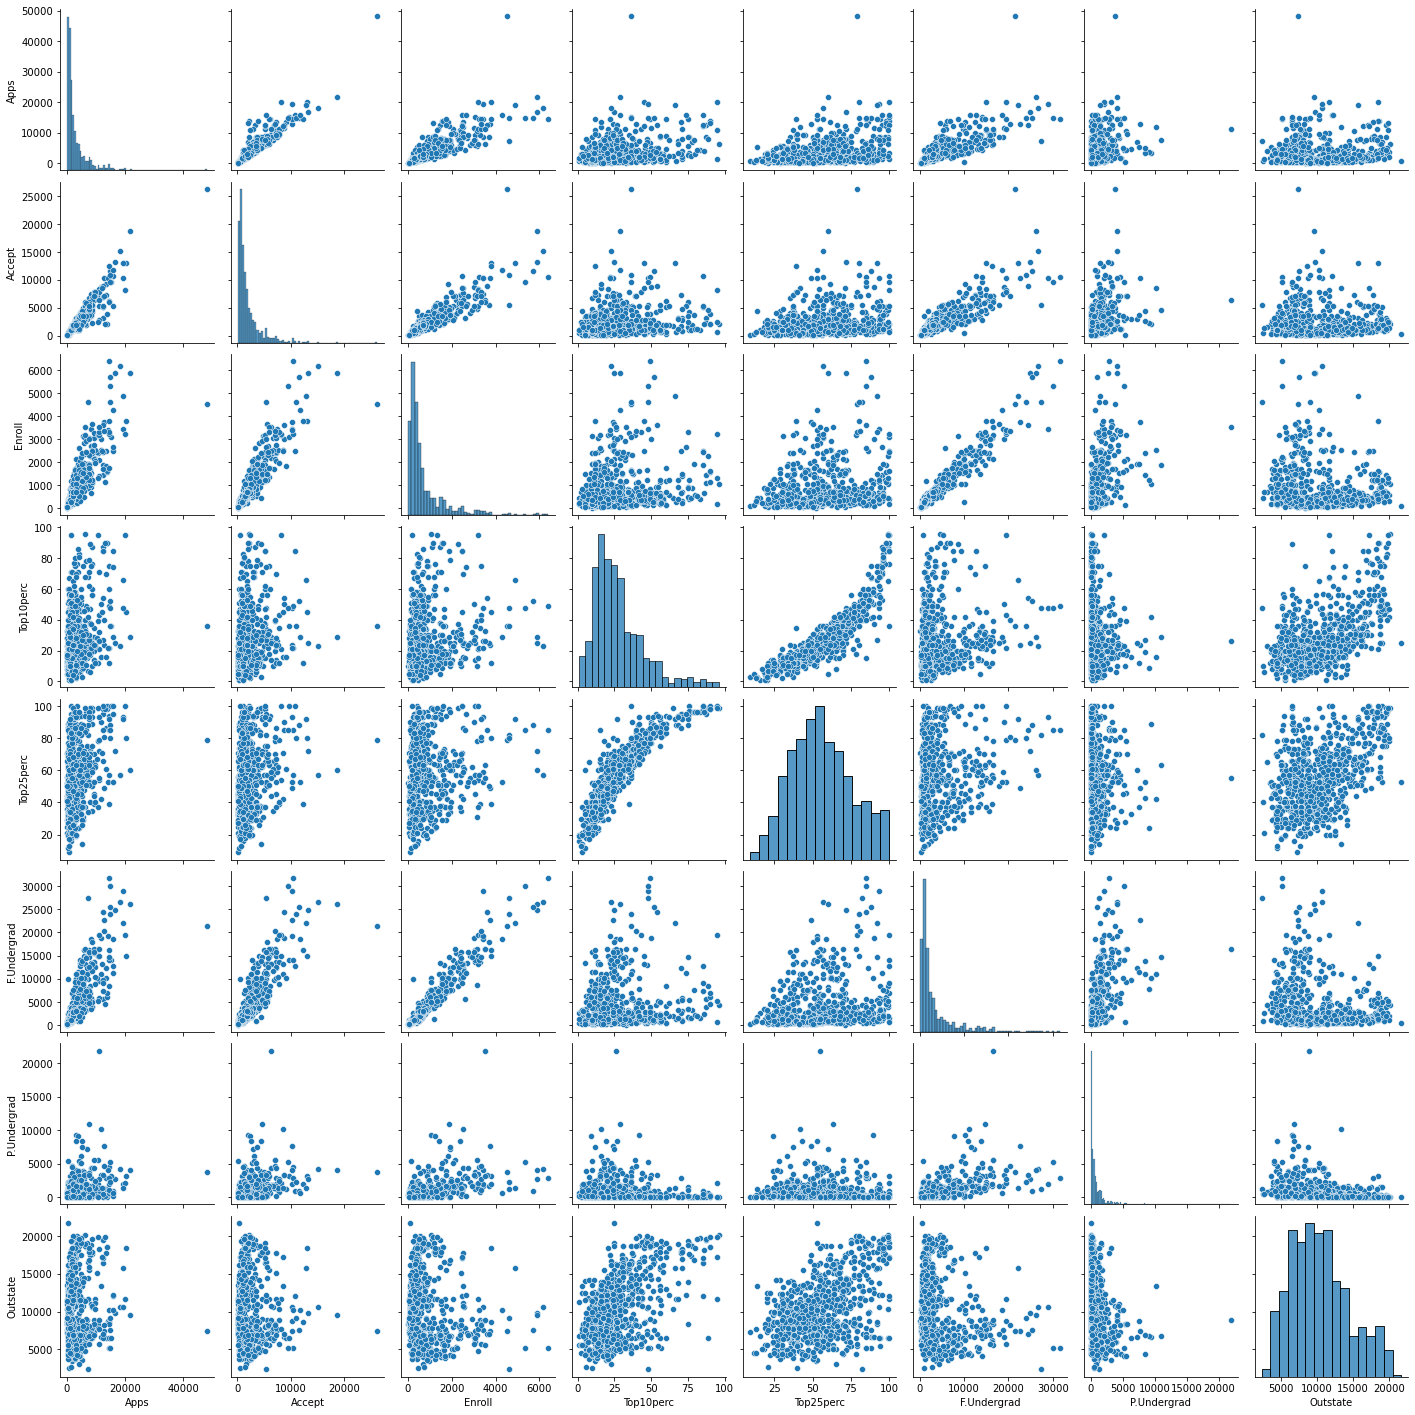

In [8]:
sns.pairplot(data.iloc[:,1:10])

<AxesSubplot:xlabel='Outstate', ylabel='Private'>

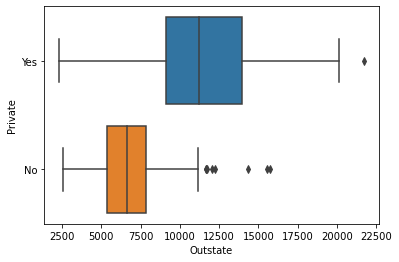

In [5]:
sns.boxplot(data = data, x= 'Outstate', y= 'Private')

In [6]:
data.loc[data['Top10perc']>50,'Elite'] = 'Yes'
data.loc[data['Top10perc']<=50,'Elite'] = 'No'

In [7]:
print((data['Elite'] == 'Yes').sum())
print((data['Elite'] == 'No').sum())

78
699


<AxesSubplot:xlabel='Outstate', ylabel='Elite'>

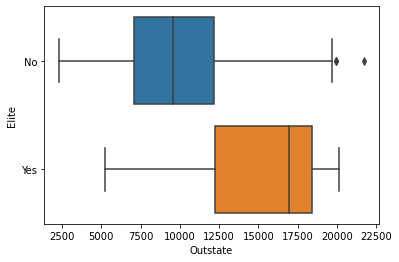

In [8]:
sns.boxplot(data = data, x= 'Outstate', y= 'Elite')

(array([521., 123.,  60.,  30.,  16.,  16.,   1.,   4.,   2.,   4.]),
 array([  35. ,  670.7, 1306.4, 1942.1, 2577.8, 3213.5, 3849.2, 4484.9,
        5120.6, 5756.3, 6392. ]),
 <BarContainer object of 10 artists>)

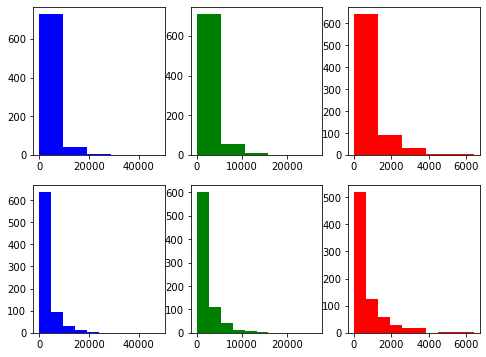

In [15]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),) = plt.subplots(2,3, figsize=(8,6))
ax1.hist(data = data, bins = 5, x= 'Apps', color = 'blue', label = 'Apps')
ax2.hist(data = data, bins = 5, x= 'Accept', color = 'green', label = 'Accept')
ax3.hist(data = data, bins = 5, x= 'Enroll', color = 'red', label = 'Enroll')
ax4.hist(data = data, bins = 10, x= 'Apps', color = 'blue', label = 'Apps')
ax5.hist(data = data, bins =10, x= 'Accept', color = 'green', label = 'Accept')
ax6.hist(data = data, bins = 10, x= 'Enroll', color = 'red', label = 'Enroll')